# Influence of the grid for continuum states

Last but not least, the grid is a very important parameter when it comes to find the eigenstates of a Hamiltonian matrix. Two parameters characterize a 1D grid: the grid spacing (the distance between two grid points) and the grid extension (the range spanned by the $x$-axis). Let us find out how these parameters influence the continuum and bound states found numerically.

## Initialization

### Import some modules and classes

In [1]:
from siegpy import (Hamiltonian, SWPotential, UniformCoordMap,
                    SWPBasisSet)
import numpy as np
from copy import deepcopy

### Define a potential

In [2]:
siegerts = SWPBasisSet.from_file("siegerts.dat")
pot = siegerts.potential

## Influence of the grid step

Having two parameters to consider, we'll vary one while keeping the other constant. Let us begin with the grid step. The grid extension being constant, this amounts to using different number of grid points.

### Define the same potential with multiple grid steps

In [3]:
# Set the grid extension
xmax = 7.5
# Set the various grids
factors = [1, 2, 4, 8, 16]
npts_list = [f*50 + 1 for f in factors]
print('npts_list:', npts_list)
xgrids = [np.linspace(-xmax, xmax, npts) for npts in npts_list]
# List the grid steps
hx_list = [g[1]-g[0] for g in xgrids]
print("grid spacings:", hx_list)
# Discretize the potential over the multiple grid steps
pots = []
for xgrid in xgrids:
    pots.append(deepcopy(pot))
    pots[-1].grid = xgrid

npts_list: [51, 101, 201, 401, 801]
grid spacings: [0.29999999999999982, 0.15000000000000036, 0.075000000000000178, 0.037499999999999645, 0.018749999999999822]


### Define the coordinate mapping

The same coordinate mapping will be used throughout this notebook.

In [4]:
theta = 0.0
cm = UniformCoordMap(theta)

### Define the Hamiltonians

In [5]:
hams_hx = [Hamiltonian(pot, cm) for pot in pots]

### Solve the Hamiltonians

In [6]:
basissets_hx = [ham.solve() for ham in hams_hx]

### Compare the spectra

As usual, the easiest way is to plot the energies of the eigenstates and their virial values:

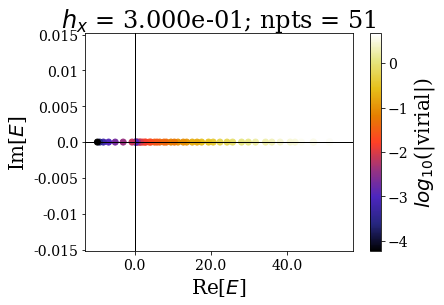

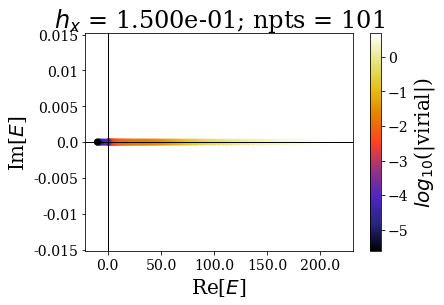

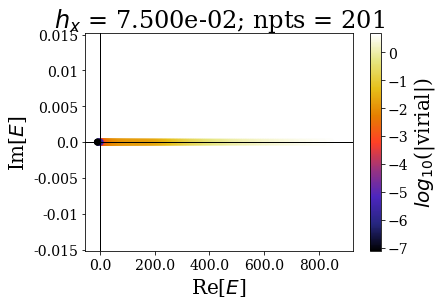

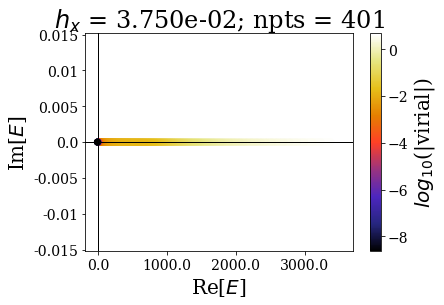

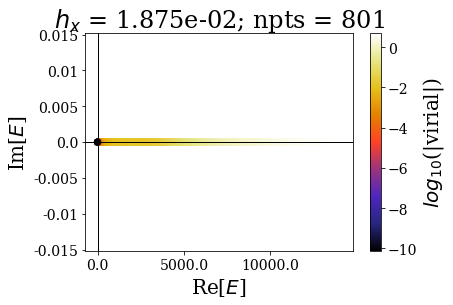

In [7]:
for i, basis in enumerate(basissets_hx):
    tit = "$h_x$ = {:.3e}; npts = {}".format(hx_list[i], len(basis))
    basis.plot_energies(title=tit)

By decreasing the grid step (*i.e.*, increasing the number of grid points), the energy range of continuum states increases, and so does the virial values range (lower virial values are obtained if more grid points are used, *i.e.* the quality of the eigenstates is better).

Let us zoom in close to the 0 energy, to have a clearer view:

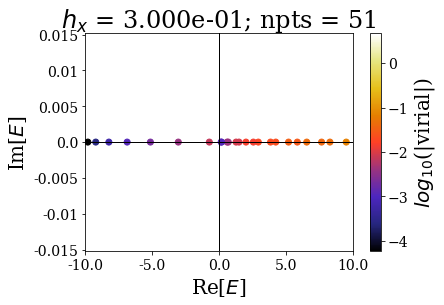

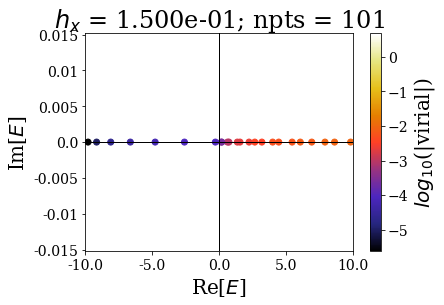

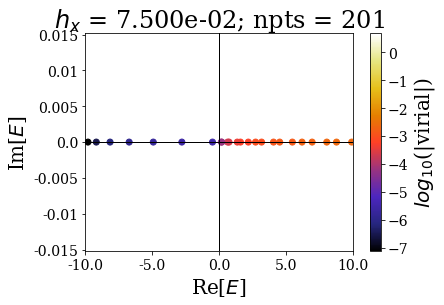

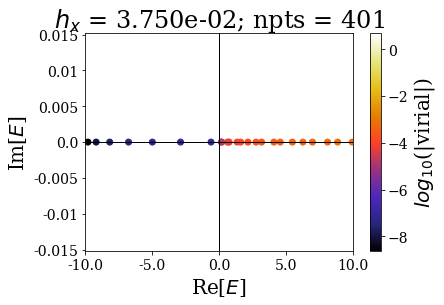

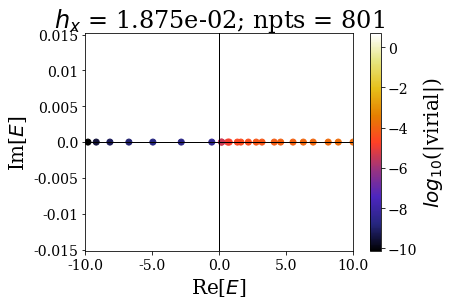

In [8]:
for i, basis in enumerate(basissets_hx):
    tit = "$h_x$ = {:.3e}; npts = {}".format(hx_list[i], len(basis))
    basis.plot_energies(xlim=(-10, 10), title=tit)

This shows that the spectrum in this range is slighty modified by the grid spacing: the results are almost converged in this energy range, even for the lowest number of grid points. Still, it requires much more grid points to have good enough virial values to have a good discrimination of the bound and continuum states.

Finally, the next cell shows the convergence of some low energy bound and continuum states as a function of the decreasing grid spacing:

In [10]:
# Show convergence of bound states energies
for i in range(7):
    print("Bound state n° {}:".format(i+1))
    for j, basis in enumerate(basissets_hx):
        print("hx = {:.3e}; E = {:.4e}".format(hx_list[j], basis.bounds[i].energy.real))
# Show convergence of continuum states energies
for i in 0, 10, 20, 30:
    print("Continuum state n° {}:".format(i+1))
    for j, basis in enumerate(basissets_hx):
        print("hx = {:.3e}; E = {:.4e}".format(hx_list[j], basis.continuum[i].energy.real))

Bound state n° 1:
hx = 3.000e-01; E = -9.8030e+00
hx = 1.500e-01; E = -9.7871e+00
hx = 7.500e-02; E = -9.7926e+00
hx = 3.750e-02; E = -9.7955e+00
hx = 1.875e-02; E = -9.7939e+00
Bound state n° 2:
hx = 3.000e-01; E = -9.2128e+00
hx = 1.500e-01; E = -9.1499e+00
hx = 7.500e-02; E = -9.1720e+00
hx = 3.750e-02; E = -9.1836e+00
hx = 1.875e-02; E = -9.1771e+00
Bound state n° 3:
hx = 3.000e-01; E = -8.2322e+00
hx = 1.500e-01; E = -8.0936e+00
hx = 7.500e-02; E = -8.1434e+00
hx = 3.750e-02; E = -8.1694e+00
hx = 1.875e-02; E = -8.1549e+00
Bound state n° 4:
hx = 3.000e-01; E = -6.8672e+00
hx = 1.500e-01; E = -6.6289e+00
hx = 7.500e-02; E = -6.7175e+00
hx = 3.750e-02; E = -6.7633e+00
hx = 1.875e-02; E = -6.7381e+00
Bound state n° 5:
hx = 3.000e-01; E = -5.1297e+00
hx = 1.500e-01; E = -4.7772e+00
hx = 7.500e-02; E = -4.9152e+00
hx = 3.750e-02; E = -4.9856e+00
hx = 1.875e-02; E = -4.9474e+00
Bound state n° 6:
hx = 3.000e-01; E = -3.0481e+00
hx = 1.500e-01; E = -2.5889e+00
hx = 7.500e-02; E = -2.7830e

## Influence of the grid extension

Let us now review how the grid extension influences the eigenstates.

### Define the same potential with multiple grid extensions

In [11]:
# Set the grid spacing
hx = 0.0375
# Set the various grids via the grid extension
factors = range(1, 6)
xmax_list = [f*100*hx for f in factors]
print('xmax_list:', xmax_list)
xgrids = [np.arange(-xmax, xmax+hx/2, hx) for xmax in xmax_list]
# List the number of points
npts_list = [len(g) for g in xgrids]
print('npts_list:', npts_list)
# Discretize the potential over the multiple grid steps
pots = []
for xgrid in xgrids:
    pots.append(deepcopy(pot))
    pots[-1].grid = xgrid

xmax_list: [3.75, 7.5, 11.25, 15.0, 18.75]
npts_list: [201, 401, 601, 801, 1001]


### Define the Hamiltonians

In [12]:
# The same uniform coordinate mapping is used
hams_xmax = [Hamiltonian(pot, cm) for pot in pots]

### Solve the Hamiltonians

In [13]:
basissets_xmax = [ham.solve() for ham in hams_xmax]

### Compare the spectra

As usual, the easiest way is to plot the energies of the eigenstates and their virial values:

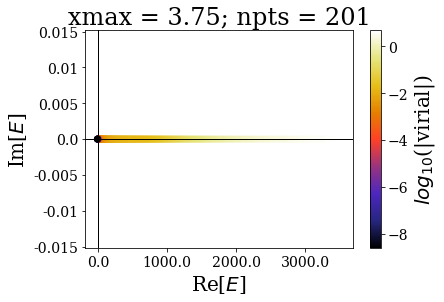

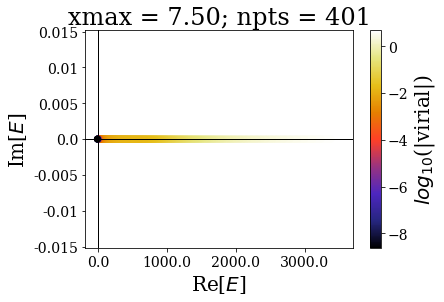

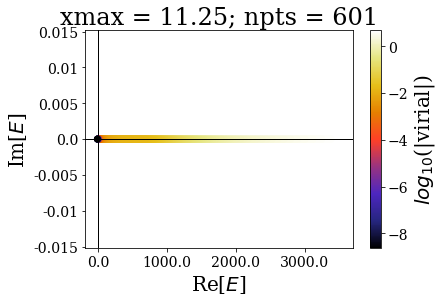

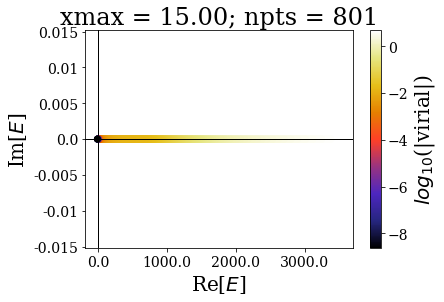

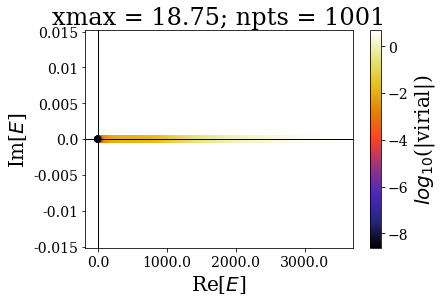

In [19]:
for basis in basissets_xmax:
    tit = "xmax = {:.2f}; npts = {}".format(basis[0].grid[-1], len(basis))
    basis.plot_energies(title=tit)

By increasing the grid extension while keeping the same grid step, the energy range of continuum states increases and the virial values range is not modified, even though the number of eigenstates is larger.

Let us zoom in close to the 0 energy, to have a clearer view:

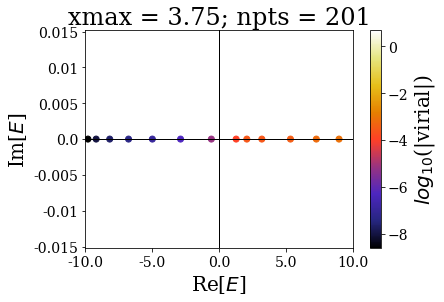

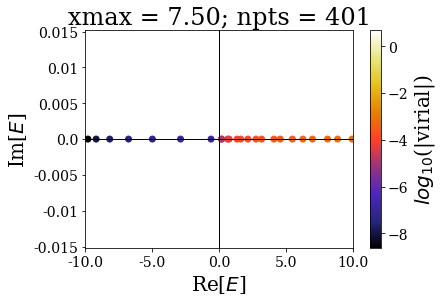

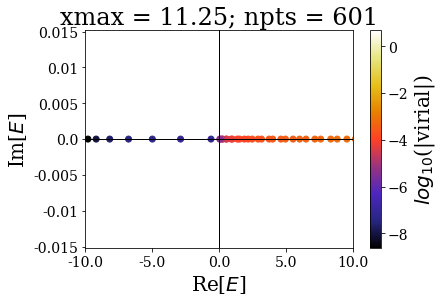

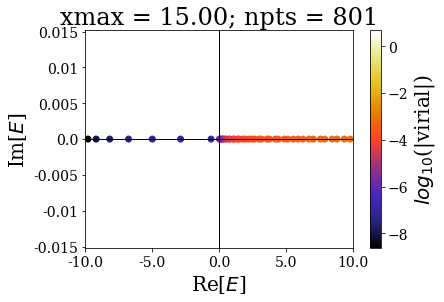

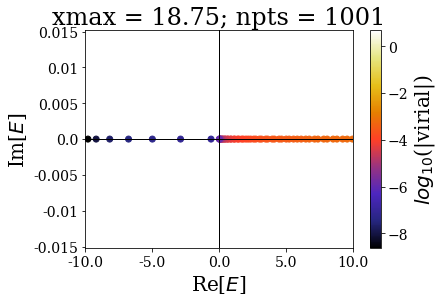

In [16]:
for basis in basissets_xmax:
    tit = "xmax = {:.2f}; npts = {}".format(basis[0].grid[-1], len(basis))
    basis.plot_energies(xlim=(-10, 10), title=tit)

These plots show that the spectrum in this range is largely modified by the grid extension: there is a convergence of the bound states, but not of the continuum states. The latter fact is known as the continuum collapse, and is related to the confinement (*i.e.*, it is as if the 1D square-well potential was embedded inside a larger, infinite square well potential). It causes trouble whenever one is interested in having a finer sampling of the high energy spectrum of continuum states, because using a larger grid extension causes an accumulation above the threshold energy (here 0). This is actually one motivation for using the Siegert states instead of continuum states: thanks to the smooth exterior complex scaling, there is no need to largely increase the grid extension, because then the resonant states resemble bound states. This will be presented in the next notebook.

The bound states being normalizable, then can however easily converge with respect to the grid extension: it has to be large enough to accomodate for the exponential tails of the highest energy bound states.

These facts are evidenced by the next cells:

In [17]:
# Show convergence of bound states energies
for i in range(7):
    print("Bound state n° {}:".format(i+1))
    for j, basis in enumerate(basissets_xmax):
        print("xmax = {:.2f}; E = {:.4e}".format(xmax_list[j], basis.bounds[i].energy.real))

Bound state n° 1:
xmax = 3.75; E = -9.7955e+00
xmax = 7.50; E = -9.7955e+00
xmax = 11.25; E = -9.7955e+00
xmax = 15.00; E = -9.7955e+00
xmax = 18.75; E = -9.7955e+00
Bound state n° 2:
xmax = 3.75; E = -9.1836e+00
xmax = 7.50; E = -9.1836e+00
xmax = 11.25; E = -9.1836e+00
xmax = 15.00; E = -9.1836e+00
xmax = 18.75; E = -9.1836e+00
Bound state n° 3:
xmax = 3.75; E = -8.1694e+00
xmax = 7.50; E = -8.1694e+00
xmax = 11.25; E = -8.1694e+00
xmax = 15.00; E = -8.1694e+00
xmax = 18.75; E = -8.1694e+00
Bound state n° 4:
xmax = 3.75; E = -6.7633e+00
xmax = 7.50; E = -6.7633e+00
xmax = 11.25; E = -6.7633e+00
xmax = 15.00; E = -6.7633e+00
xmax = 18.75; E = -6.7633e+00
Bound state n° 5:
xmax = 3.75; E = -4.9855e+00
xmax = 7.50; E = -4.9856e+00
xmax = 11.25; E = -4.9856e+00
xmax = 15.00; E = -4.9856e+00
xmax = 18.75; E = -4.9856e+00
Bound state n° 6:
xmax = 3.75; E = -2.8798e+00
xmax = 7.50; E = -2.8806e+00
xmax = 11.25; E = -2.8806e+00
xmax = 15.00; E = -2.8806e+00
xmax = 18.75; E = -2.8806e+00
Boun

The convergence of the bound states is easier for the ones of lowest energy, because they require a smaller grid extension to accomodate for their exponential tail.

The situation is completely for the continuum states:

In [18]:
# Show convergence of continuum states energies
for i in 0, 10, 20, 30:
    print("Continuum state n° {}:".format(i+1))
    for j, basis in enumerate(basissets_xmax):
        msg = "xmax = {:.2f}; E = {:.4e}".format(xmax_list[j], basis.continuum[i].energy.real)
        show_plots = False  # Set to True to show plots instead
        if show_plots:
            basis.continuum[i].plot(title=msg)
        else:
            print(msg)

Continuum state n° 1:
xmax = 3.75; E = 1.2714e+00
xmax = 7.50; E = 1.6528e-01
xmax = 11.25; E = 5.8330e-02
xmax = 15.00; E = 2.9455e-02
xmax = 18.75; E = 1.7712e-02
Continuum state n° 11:
xmax = 3.75; E = 1.9194e+01
xmax = 7.50; E = 5.4710e+00
xmax = 11.25; E = 1.8837e+00
xmax = 15.00; E = 1.0282e+00
xmax = 18.75; E = 6.2960e-01
Continuum state n° 21:
xmax = 3.75; E = 6.1785e+01
xmax = 7.50; E = 1.5531e+01
xmax = 11.25; E = 6.4879e+00
xmax = 15.00; E = 3.1642e+00
xmax = 18.75; E = 1.8083e+00
Continuum state n° 31:
xmax = 3.75; E = 1.1872e+02
xmax = 7.50; E = 2.8670e+01
xmax = 11.25; E = 1.2183e+01
xmax = 15.00; E = 7.0408e+00
xmax = 18.75; E = 4.1276e+00


The continuum collapse is clearly evidenced here: the energy of the $n$-th continuum state decreases when the grid extension increases. By plotting the wavefunctions of these states, one could see that the wavefunctions of these states are not always related to eachother.

## Conclusion

The two grid step and the grid extension are the two parameters to consider to reach a convergence of the numerical eigenstates (at least when using grids where the points are not evenly distributed). They have two distincts influence on the obtained spectra:

- Decreasing the grid step allows for states of better quality (*i.e.*, of lower virial), and the bound and continuum states converge to a given value, even though the convergence is rather slow (*e.g.*, it may require a large number of grid points). It also allows to define continuum states of higher energy.

- Increasing the grid extension allows for a convergence of the bound states only (the grid extension must be large enough for their exponential tail to vanish), but not for the continuum states, where an accumulation of states above the zero energy is observed (known as the continuum collapse) while leaving the range of energies and virial values unchanged. This means that there is no need to increase the grid extension if the bound states are converged with respect to this parameter and if the discretization of the continuum states allows to reach high enough energies with a sufficient precision.